# Forward Problem
## Diffusion 

In [1]:
from diffusion import DiffusionNN, make_forward_fn, make_diffusion_loss
import torch
import torchopt
from tqdm import tqdm

[2024-06-09 16:19:48,418] torch.distributed.elastic.multiprocessing.redirects: [WARNING] NOTE: Redirects are currently not supported in Windows or MacOs.


In [2]:
#Constants to initialize
x_domain = (-1, 1)
t_domain = (0, 1)
learning_rate = 0.01
n_epochs = 5000
batch_size = 50
resampling_window = 50

In [3]:
#Model and functional setup
diffusion_model = DiffusionNN()
diffusion_function = make_forward_fn(diffusion_model)

diffusion_loss = make_diffusion_loss(diffusion_function)

optimizer = torchopt.FuncOptimizer(torchopt.adam(lr=learning_rate))

params = tuple(diffusion_model.parameters())

 Training the network with a random uniform distribution

In [4]:
#Defining the training process
loss_evolution = []

for epoch in tqdm(range(n_epochs), desc="Training process:", unit="epoch"):
    #Every n epochs we resample the residual points
    if epoch % resampling_window == 0:
        x = torch.FloatTensor(batch_size).uniform_(x_domain[0], x_domain[1])
        t = torch.FloatTensor(batch_size).uniform_(t_domain[0], t_domain[1])

    #We compute the loss
    loss = diffusion_loss(x, t, params)
    #Update the parameters with the functional optimizer
    params = optimizer.step(loss, params)
    #Keeping track of the loss
    loss_evolution.append(float(loss))

Training process::   0%|          | 0/5000 [00:00<?, ?epoch/s]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Training process:: 100%|██████████| 5000/5000 [01:21<00:00, 61.73epoch/s]


In [5]:
torch.save(diffusion_model.state_dict(), "models/diffusion_small.pt")

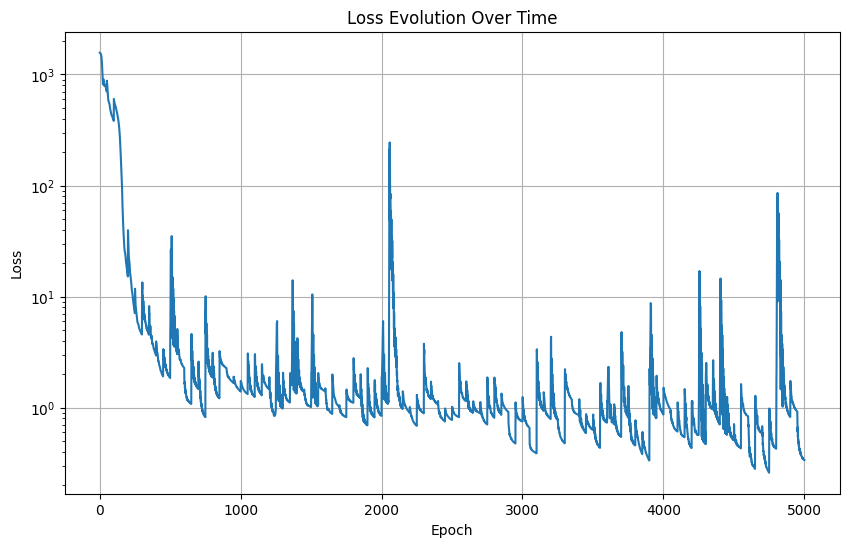

In [6]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_evolution) + 1), loss_evolution, linestyle='-')
plt.title('Loss Evolution Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale("log")
plt.grid(True)
plt.show()

(100, 100)
(100, 100)
(100, 100)


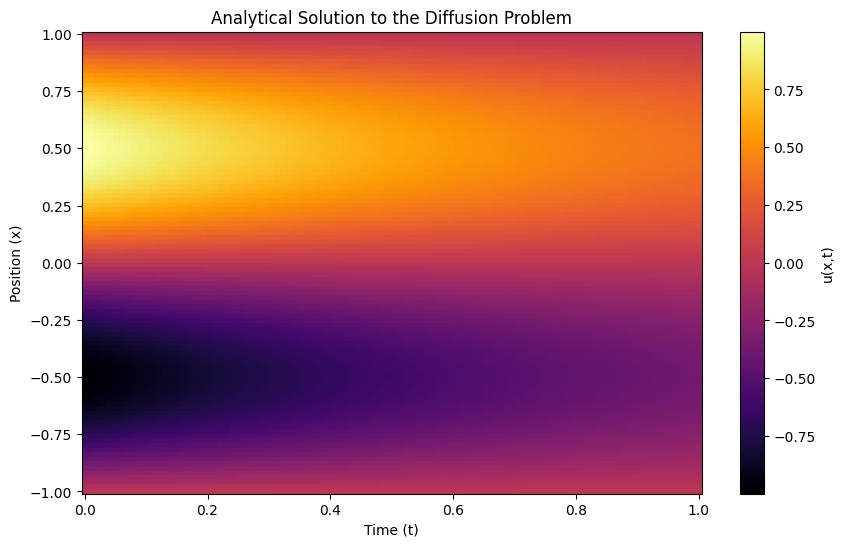

In [7]:
from pdes import diffusion

# Create a grid of x and t values
x_values = torch.linspace(-1, 1, 100)
t_values = torch.linspace(0, 1, 100)
x_grid, t_grid = torch.meshgrid(x_values, t_values, indexing='ij')

# Compute the diffusion values on the grid
u_values = diffusion(x_grid, t_grid)

# Convert to numpy for plotting
x_grid_np = x_grid.numpy()
t_grid_np = t_grid.numpy()
u_values_np = u_values.numpy()

print(x_grid_np.shape)
print(t_grid_np.shape)
print(u_values_np.shape)

# Plotting the 2D colored graph
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_grid_np, x_grid_np, u_values_np, shading='auto', cmap='inferno')
plt.colorbar(label='u(x,t)')
plt.xlabel('Time (t)')
plt.ylabel('Position (x)')
plt.title('Analytical Solution to the Diffusion Problem')
plt.show()

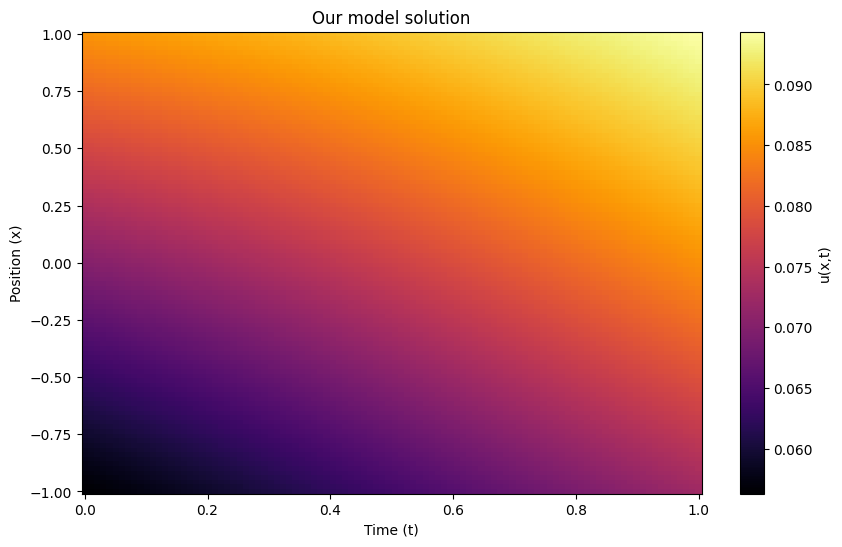

In [8]:
# Create a grid of x and t values
x_values = torch.linspace(-1, 1, 100)
t_values = torch.linspace(0, 1, 100)
x_grid, t_grid = torch.meshgrid(x_values, t_values, indexing='ij')

# Compute the diffusion values on the grid
with torch.no_grad():
    u_values = diffusion_model(torch.stack((x_grid.flatten(), t_grid.flatten()), dim = 1)).reshape(x_grid.shape)

# Convert to numpy for plotting
x_grid_np = x_grid.numpy()
t_grid_np = t_grid.numpy()
u_values_np = u_values.numpy()

# Plotting the 2D colored graph
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_grid_np, x_grid_np, u_values_np, shading='auto', cmap='inferno')
plt.colorbar(label='u(x,t)')
plt.xlabel('Time (t)')
plt.ylabel('Position (x)')
plt.title('Our model solution')
plt.show()

In [12]:
for epoch in tqdm(range(n_epochs), desc="Training process:", unit="epoch"):
    #Every n epochs we resample the residual points
    if epoch % resampling_window == 0:
        x = torch.FloatTensor(batch_size).uniform_(x_domain[0], x_domain[1])
        t = torch.FloatTensor(batch_size).uniform_(t_domain[0], t_domain[1])

    #We compute the loss
    loss = diffusion_loss(x, t, params)
    #Update the parameters with the functional optimizer
    params = optimizer.step(loss, params)
    #Keeping track of the loss
    loss_evolution.append(float(loss))

torch.save(diffusion_model.state_dict(), "models/diffusion_small.pt")

Training process:: 100%|██████████| 5000/5000 [01:54<00:00, 43.73epoch/s]


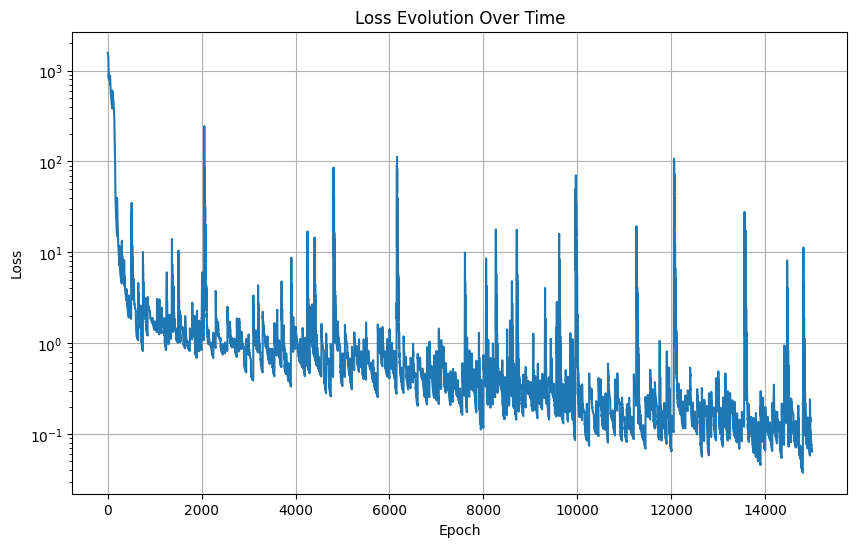

In [13]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_evolution) + 1), loss_evolution, linestyle='-')
plt.title('Loss Evolution Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale("log")
plt.grid(True)
plt.show()

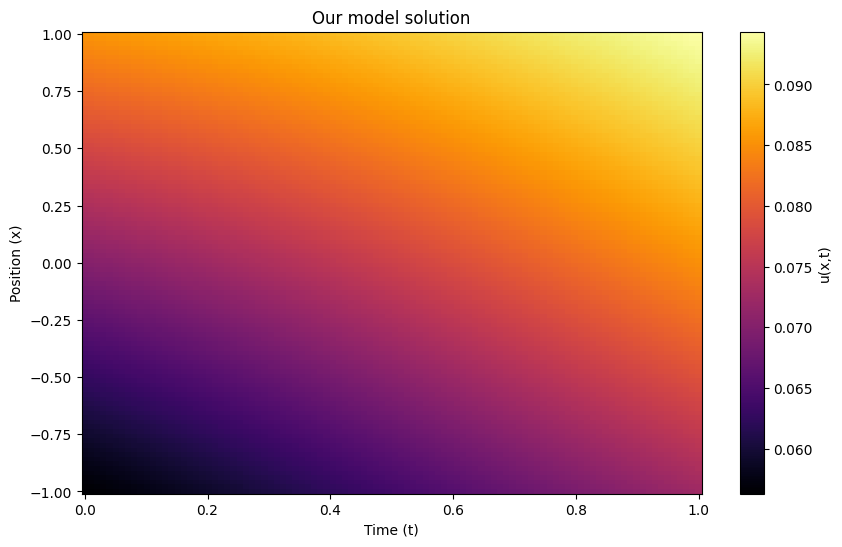

: 

In [14]:
# Create a grid of x and t values
x_values = torch.linspace(-1, 1, 100)
t_values = torch.linspace(0, 1, 100)
x_grid, t_grid = torch.meshgrid(x_values, t_values, indexing='ij')

# Compute the diffusion values on the grid
with torch.no_grad():
    u_values = diffusion_model(torch.stack((x_grid.flatten(), t_grid.flatten()), dim = 1)).reshape(x_grid.shape)

# Convert to numpy for plotting
x_grid_np = x_grid.numpy()
t_grid_np = t_grid.numpy()
u_values_np = u_values.numpy()

# Plotting the 2D colored graph
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_grid_np, x_grid_np, u_values_np, shading='auto', cmap='inferno')
plt.colorbar(label='u(x,t)')
plt.xlabel('Time (t)')
plt.ylabel('Position (x)')
plt.title('Our model solution')
plt.show()

## We now train a larger network

In [ ]:
#Constants to initialize
x_domain = (-1, 1)
t_domain = (0, 1)
learning_rate = 0.01
n_epochs = 5000
batch_size = 10
resampling_window = 10    #Should we make this larger

In [ ]:
#Model and functional setup
diffusion_model_2 = DiffusionNN([2, 10, 10, 10, 10, 1])
diffusion_function_2 = make_forward_fn(diffusion_model_2)

diffusion_loss_2 = make_diffusion_loss(diffusion_function_2)

optimizer_2 = torchopt.FuncOptimizer(torchopt.adam(lr=learning_rate))

params_2 = tuple(diffusion_model_2.parameters())

In [ ]:
#Defining the training process
loss_evolution_2 = []

for epoch in tqdm(range(n_epochs), desc="Training process:", unit="epoch"):
    #Let's start with a uniform distribution of the data
    if epoch % resampling_window == 0: 
        x = torch.FloatTensor(batch_size).uniform_(x_domain[0], x_domain[1])
        t = torch.FloatTensor(batch_size).uniform_(t_domain[0], t_domain[1])

    #We compute the loss
    loss = diffusion_loss_2(x, t, params_2)
    #Update the parameters with the functional optimizer
    params_2 = optimizer_2.step(loss, params_2)
    #Keeping track of the loss
    loss_evolution_2.append(float(loss))

torch.save(diffusion_model_2.state_dict(), "diffusion_large.pth")

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_evolution_2) + 1), loss_evolution_2, linestyle='-')
plt.title('Loss Evolution Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale("log")
plt.grid(True)
plt.show()

In [ ]:
# Create a grid of x and t values
x_values = torch.linspace(-1, 1, 100)
t_values = torch.linspace(0, 1, 100)
x_grid, t_grid = torch.meshgrid(x_values, t_values, indexing='ij')

# Compute the diffusion values on the grid
with torch.no_grad():
    u_values = diffusion_model_2(torch.stack((x_grid.flatten(), t_grid.flatten()), dim = -1)).reshape(x_grid.shape)

# Convert to numpy for plotting
x_grid_np = x_grid.numpy()
t_grid_np = t_grid.numpy()
u_values_np = u_values.numpy()

# Plotting the 2D colored graph
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_grid_np, x_grid_np, u_values_np, shading='auto', cmap='inferno')
plt.colorbar(label='u(x,t)')
plt.xlabel('Time (t)')
plt.ylabel('Position (x)')
plt.title('Our model solution')
plt.show()

In [ ]:
assert False == True

In [ ]:
#Second batch
for epoch in tqdm(range(n_epochs), desc="Training process:", unit="epoch"):
    #Let's start with a uniform distribution of the data 
    x = torch.FloatTensor(batch_size).uniform_(x_domain[0], x_domain[1])
    t = torch.FloatTensor(batch_size).uniform_(t_domain[0], t_domain[1])

    #We compute the loss
    loss = diffusion_loss_2(x, t, params_2)
    #Update the parameters with the functional optimizer
    params_2 = optimizer_2.step(loss, params_2)
    #Keeping track of the loss
    loss_evolution_2.append(float(loss))

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_evolution_2) + 1), loss_evolution_2, linestyle='-')
plt.title('Loss Evolution Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale("log")
plt.grid(True)
plt.show()